In [1]:
import variational_bayes as vb
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
np.random.seed(1)
# Flip the coin
bias = 0.7
num_samples = 10
x = np.random.uniform(0, 1, num_samples) < bias

# Build the model and update it
q_bias = vb.BetaDistribution(1, 1)
model = vb.Model(
    {'bias': q_bias},
    [vb.BernoulliDistribution(q_bias).likelihood(x),
     vb.BetaDistribution(1, 1).likelihood(q_bias)]
)

model.update(None, convergence_predicate=1e-4)

(array([-10.        ,  -4.70048037,  -4.70048037]), True)

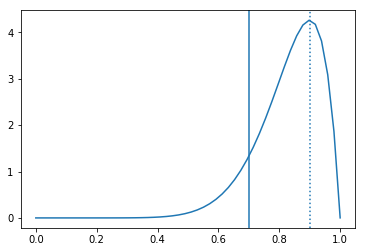

In [3]:
vb.plot_proba(q_bias, reference=bias, start=1e-5, stop=1-1e-5)
# Plot the sample mean
plt.axvline(np.mean(x), ls=':')